In [1]:
%matplotlib inline
import sys,os,getopt,argparse,math
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()


First read in the file and create data as numpy 1Darray of times  

In [2]:
mavSerialList=[]
with open('maverick_serial') as f:
    for line in f:
      mavSerialList.append(float(line.split()[1]))
mavSerialArray=np.asarray(mavSerialList)

/usr/local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/usr/local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


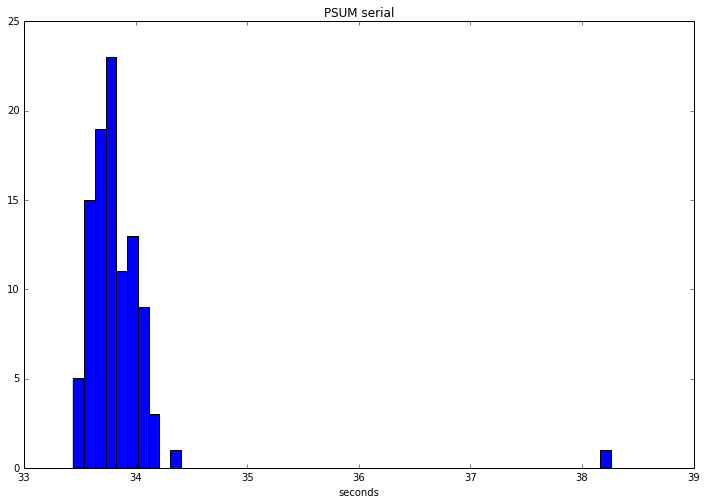

In [3]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(mavSerialArray,50)
plt.xlabel('seconds')
plt.title('PSUM serial')
plt.show()


In [4]:
#fastOpenMP1_data=np.array(filter(lambda x: x <= 42., dataArray))

In [5]:
print 'PSUM serial average is' ,np.average(mavSerialArray)
print 'PSUM serial standard deviation is',np.std(mavSerialArray)

PSUM serial average is 33.84031
PSUM serial standard deviation is 0.481275507688


In [6]:
testList=['serial','stdVec','openmp','openmp-2','tbb_rankBuffer','tbb_singleBuffer']
threadCount=[1,2,4,8,10,12,14,16,18,19,20,25,30,35,40]


In [7]:
dataListDict={}
dataArrayDict={}
for test in testList[1:]:
    for thread in threadCount[1:]:
        listPre='maverick_' + test + '_' + str(thread) 
        dataFileName=listPre + '.txt'
        listName=listPre
        dataListDict[listName]=[]
        with open(dataFileName) as f:
          for line in f:
            #print line
            if "tbb" in test:
              dataListDict[listName].append(float(line.split()[4]))
            else:
              dataListDict[listName].append(float(line.split()[2]))
for key in dataListDict:
    dataArrayDict[key]=np.asanyarray(dataListDict[key])

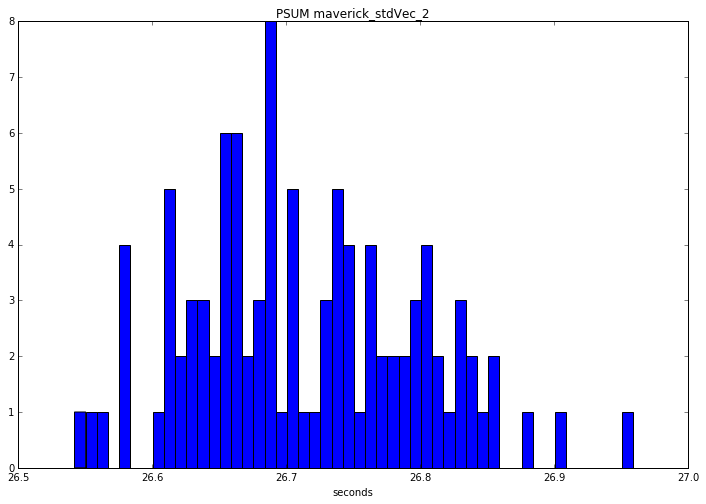

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='maverick_stdVec_2'
ax.hist(dataArrayDict[dk],50)
plt.xlabel('seconds')
plt.title('PSUM '+ dk)
plt.show()

In [9]:
stdVecVal=[]
stdVecTcount=[]
openMpVal=[]
openMpTcount=[]
openMp2Val=[]
openMp2Tcount=[]
tbbRankVal=[]
tbbRankTcount=[]
tbbSingleVal=[]
tbbSingleTcount=[]
for key in dataArrayDict:
    if key.split("_")[1]=='stdVec':
        stdVecVal.append(np.average(dataArrayDict[key]))
        stdVecTcount.append(key.split("_")[-1])
    if key.split("_")[1]=='openmp':
        openMpVal.append(np.average(dataArrayDict[key]))
        openMpTcount.append(key.split("_")[-1])
    if key.split("_")[1]=='openmp-2':
      openMp2Val.append(np.average(dataArrayDict[key]))
      openMp2Tcount.append(key.split("_")[-1])
    if 'tbb_rankBuffer' in key:
      tbbRankVal.append(np.average(dataArrayDict[key]))
      tbbRankTcount.append(key.split("_")[-1]) 
    if 'tbb_singleBuffer' in key:
      tbbSingleVal.append(np.average(dataArrayDict[key]))
      tbbSingleTcount.append(key.split("_")[-1]) 

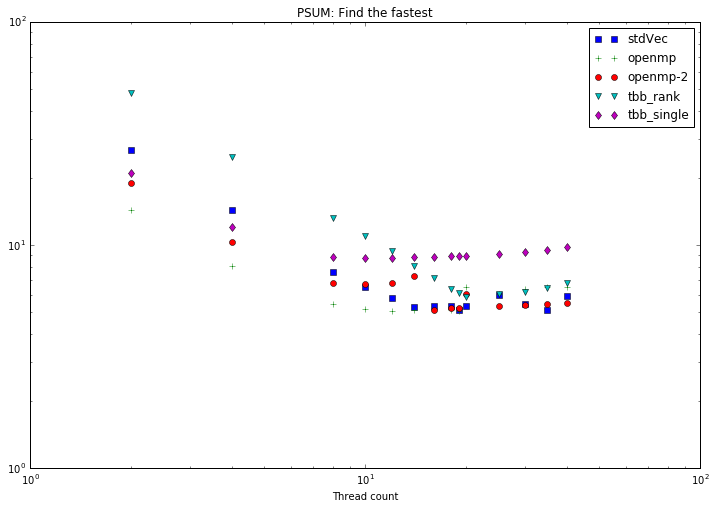

In [10]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='Find the fastest'
ax.loglog(stdVecTcount,stdVecVal,'s',label='stdVec')
ax.loglog(openMpTcount,openMpVal,'+',label='openmp')
ax.loglog(openMp2Tcount,openMp2Val,'o',label='openmp-2')
ax.loglog(tbbRankTcount,tbbRankVal,'v',label='tbb_rank')
ax.loglog(tbbSingleTcount,tbbSingleVal,'d',label='tbb_single')
plt.xlabel('Thread count')
plt.title('PSUM: '+ dk)
plt.legend()
plt.show()

In [18]:
stdVec=[]
openMp=[]
openMp2=[]
tbbRank=[]
tbbSingle=[]
for key in dataArrayDict:
    if 'stdVec' in key:
        stdVec.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
        stdVec.sort(key=lambda tup: int(tup[1]))
    if key.split("_")[1]=='openmp':
        openMp.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
        openMp.sort(key=lambda tup: int(tup[1]))
    if key.split("_")[1]=='openmp-2':
        openMp2.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
        openMp2.sort(key=lambda tup: int(tup[1]))
    if 'tbb_rankBuffer' in key:
        tbbRank.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
        tbbRank.sort(key=lambda tup: int(tup[1]))
    if 'tbb_singleBuffer' in key:
        tbbSingle.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
        tbbSingle.sort(key=lambda tup: int(tup[1]))

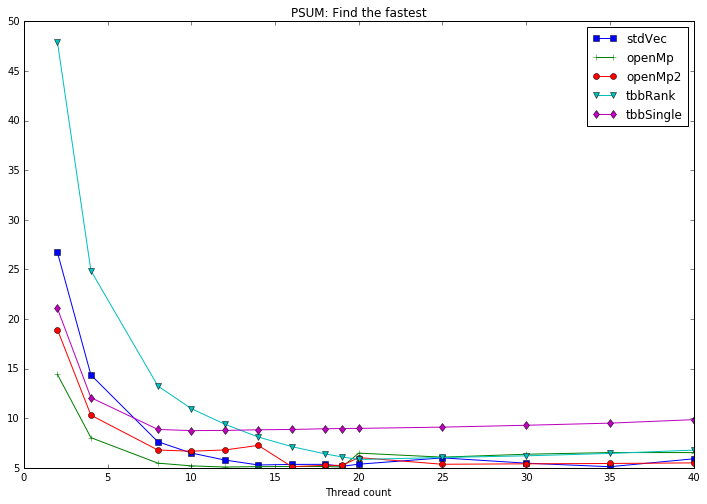

In [19]:
#plt.plot(*zip(*stdVec),'ro')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='Find the fastest'
ax.plot([x[1] for x in stdVec],[x[0] for x in stdVec],'s-',label='stdVec')
ax.plot([x[1] for x in openMp],[x[0] for x in openMp],'+-',label='openMp')
ax.plot([x[1] for x in openMp2],[x[0] for x in openMp2],'o-',label='openMp2')
ax.plot([x[1] for x in tbbRank],[x[0] for x in tbbRank],'v-',label='tbbRank')
ax.plot([x[1] for x in tbbSingle],[x[0] for x in tbbSingle],'d-',label='tbbSingle')
plt.xlabel('Thread count')
plt.title('PSUM: '+ dk)
plt.legend()
plt.show()
